# P5

Due: 12/6/19, 11:59pm

In this assignment, we'll look at using SQL and create supervised learning classification models.

First, let's get our imports and system set up.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

In [2]:
import sqlalchemy
import sqlite3

## SQL 

For this portion of the project you will look at querying a database `fec.db` that is a portion of the information reported to the Federal Elections Committee.  

Details on the form of the full data is provided here: https://classic.fec.gov/finance/disclosure/ftpdet.shtml

You will work with only a small portion of the data, ~10K transactions for each of the large tables.  

#### Table Descriptions 

Here is a list of the tables in the database. Each table links to the documentation on the FEC page for the dataset.

* [cn](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryCandidateMaster.shtml): Candidates table. Contains names and party affiliation.
* [cm](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryCommitteeMaster.shtml): Committees table. Contains committee names and types.
* [ccl](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryCandCmteLinkage.shtml): Committee to candidate links.
* [oth](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryCommitteetoCommittee.shtml): Committee to committee transactions. 
* [pas2](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryContributionstoCandidates.shtml): Contributions to Candidates from Committees.
* [indiv](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryContributionsbyIndividuals.shtml): Individual contributions. Contains recipient committee ID and transaction amount.
* [indiv_top3](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryContributionsbyIndividuals.shtml): Individual contributions focusing on top 3 candidates: Clinton, Sanders, and Trump

We can again make use of the functions `print_sql` and `pretty_print_sql` to look at the results of the sql queries. 

In [3]:
def print_sql(s):
    print('>', s)
    for result in conn.execute(s):
        print(result)
    print ()

In [4]:
def pretty_print_sql(s):
    print('>', s)
    df = pd.read_sql(s, conn)
    display(df)

### Task 1

Connect to `fec.db` and ensure you can access tables. 

For example, run the following query: `SELECT * from cn LIMIT 5`

In [5]:
conn = sqlite3.connect("data/fec.db")

In [6]:
print_sql("SELECT * from cn LIMIT 5")

> SELECT * from cn LIMIT 5
('P00003392', 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'DEM', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00575795', '', '', 'NEW YORK', 'NY', '')
('P00004861', 'BICKELMEYER, MICHAEL', 'REP', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00553206', '399 PEARL ROAD', '', 'BRUNSWICK', 'OH', '44212.0')
('P20002721', 'SANTORUM, RICHARD J.', 'REP', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00578492', 'P.O. BOX 238', '', 'VERONA', 'PA', '15147.0')
('P20002838', 'HILL, CHRISTOPHER V', 'REP', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00567743', '9900 CORPORATE CAMPUS DR STE 3000', '', 'LOUISVILLE', 'KY', '40223.0')
('P20003281', 'PERRY, JAMES R (RICK)', 'REP', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00500587', 'PO BOX 162406', '', 'AUSTIN', 'TX', '78716.0')



### Task 2 (20 points)

**A.** We want to know the number of political actions committees (PACs) that donated large sums of money to the candidates. To begin to answer this question, we will look at the `oth` table. We'll find all the transactions that exceed $5,000.  Rather than print out the entire list. 
Construct a query to count the number of entries. 

In [75]:
pretty_print_sql("""
SELECT count(*)
FROM oth WHERE (CAST(transaction_amt AS real) > 5000);
""")

> 
SELECT count(*)
FROM oth WHERE (CAST(transaction_amt AS real) > 5000);



,count(*)
0,498


**B.** Having seen that there aren't too many transactions that exceed 5,000 dollars, let's find them all.  Using only SQL, construct a table containing the ID of the donor committee, name, employer, other committee's/candidate's ID, and the transaction amount, for transactions that exceed 5,000 dollars.  Sort the transactions in decreasing order by amount.

In [76]:
pretty_print_sql("""
SELECT 
    cmte_id AS donor_cmte_id, 
    name AS name, 
    employer AS employer,
    other_id AS other_cmte_id,
    CAST(transaction_amt AS real) AS transactn_amt
FROM oth
WHERE (transactn_amt> 5000)
ORDER BY transactn_amt DESC
""")

> 
SELECT 
    cmte_id AS donor_cmte_id, 
    name AS name, 
    employer AS employer,
    other_id AS other_cmte_id,
    CAST(transaction_amt AS real) AS transactn_amt
FROM oth
WHERE (transactn_amt> 5000)
ORDER BY transactn_amt DESC



,donor_cmte_id,name,employer,other_cmte_id,transactn_amt
0,C00010603,GMMB,,P00003392,4645717.0
1,C00541292,"TARGET ENTERPRISES, LLC",,P60006723,2758566.0
2,C00495861,TARGETED PLATFORM MEDIA LLC,,P80001571,1704667.0
3,C00541292,"TARGET ENTERPRISES, LLC",,P60006723,1217580.0
4,C00574533,DEL CIELO MEDIA,,P00003392,1100000.0
5,C00571372,OATH STRATEGIES LLC,,P60008059,1032549.0
6,C00592337,"SRCP MEDIA, INC.",,P60006111,1029303.0
7,C00541292,"TARGET ENTERPRISES, LLC",,P60006723,951130.0
8,C00495861,FUSE,,P80001571,644100.0
9,C00573154,NEYLAN & PARTNERS,,P60007242,643000.0


**C.** We might see the same committee in this table multiple times.  Therefore, let's instead report the total transactions by each commitee.  Return the committee ID, name and total transaction amount.  Limit your results to the top 20. 

In [77]:
pretty_print_sql("""
SELECT 
    cmte_id AS donor_cmte_id, 
    name AS name, 
    CAST(SUM(transaction_amt) AS real) AS total_transaction_amt
FROM oth
GROUP BY donor_cmte_id
ORDER BY total_transaction_amt DESC
LIMIT 20
""")

> 
SELECT 
    cmte_id AS donor_cmte_id, 
    name AS name, 
    CAST(SUM(transaction_amt) AS real) AS total_transaction_amt
FROM oth
GROUP BY donor_cmte_id
ORDER BY total_transaction_amt DESC
LIMIT 20



,donor_cmte_id,name,total_transaction_amt
0,C00541292,"TARGET ENTERPRISES, LLC",8873217.0
1,C00010603,"ANZALONE LISZT RESEARCH, INC.",5031605.0
2,C00495861,FUSE,3268832.0
3,C00571372,OATH STRATEGIES LLC,2725554.0
4,C00608489,GROUND GAME STRATEGIES,1897869.0
5,C00592337,"SRCP MEDIA, INC.",1429303.0
6,C00581868,"NEW DAY MEDIA, LLC",1424832.0
7,C00473918,"PRECISION NETWORK, LLC",1254076.0
8,C00574533,REDPRINT STRATEGY,1219343.0
9,C00575373,GLITTERING STEEL LLC,1046392.0


**D.** Look at common transactions between donor and recipient committees.  Find the fields that uniquely identify recipient committees and repeat your analysis from the previous question using that new identifier. Return the committee ID, *new field* and total transaction amount.  Limit your results to the top 20. 

In [78]:
pretty_print_sql("""
SELECT 
    cmte_id AS donor_cmte_id, 
    other_id AS recipient_id, 
    CAST(SUM(transaction_amt) AS real) AS total_transaction_amt
FROM oth
GROUP BY cmte_id, other_id
ORDER BY total_transaction_amt DESC
LIMIT 20
""")

> 
SELECT 
    cmte_id AS donor_cmte_id, 
    other_id AS recipient_id, 
    CAST(SUM(transaction_amt) AS real) AS total_transaction_amt
FROM oth
GROUP BY cmte_id, other_id
ORDER BY total_transaction_amt DESC
LIMIT 20



,donor_cmte_id,recipient_id,total_transaction_amt
0,C00541292,P60006723,7857973.0
1,C00010603,P00003392,5031605.0
2,C00495861,P80001571,3053194.0
3,C00571372,P60008059,2404188.0
4,C00608489,P80001571,1893356.0
5,C00581868,P60003670,1424832.0
6,C00574533,P00003392,1219343.0
7,C00615815,P80001571,1039415.0
8,C00592337,P60006111,1029303.0
9,C00573154,P60007242,989364.0


### Task 3 (5 points) 

From the query **D** above, let's add additional information by considering joining with the `cm` table and `cn` table in order to get the names of committees or candidates involved in the transactions. 

In [80]:
pretty_print_sql("""
SELECT 
o.cmte_id AS donor_cmte_id, 
o.other_id AS recipient_id, 
CAST(SUM(o.transaction_amt) AS real) AS total_transaction_amt,
n.cand_name AS canditate_name
FROM oth o JOIN cn n ON n.cand_id = o.other_id
GROUP BY o.cmte_id, o.other_id
ORDER BY total_transaction_amt DESC
LIMIT 20
""")

> 
SELECT 
o.cmte_id AS donor_cmte_id, 
o.other_id AS recipient_id, 
CAST(SUM(o.transaction_amt) AS real) AS total_transaction_amt,
n.cand_name AS canditate_name
FROM oth o JOIN cn n ON n.cand_id = o.other_id
GROUP BY o.cmte_id, o.other_id
ORDER BY total_transaction_amt DESC
LIMIT 20



,donor_cmte_id,recipient_id,total_transaction_amt,canditate_name
0,C00010603,P00003392,5031605.0,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
1,C00495861,P80001571,3053194.0,"TRUMP, DONALD J. / MICHAEL R. PENCE"
2,C00571372,P60008059,2404188.0,"BUSH, JEB"
3,C00608489,P80001571,1893356.0,"TRUMP, DONALD J. / MICHAEL R. PENCE"
4,C00581868,P60003670,1424832.0,"KASICH, JOHN R"
5,C00574533,P00003392,1219343.0,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
6,C00615815,P80001571,1039415.0,"TRUMP, DONALD J. / MICHAEL R. PENCE"
7,C00592337,P60006111,1029303.0,"CRUZ, RAFAEL EDWARD ""TED"""
8,C00573154,P60007242,989364.0,"FIORINA, CARLY"
9,C00541292,P60006111,863410.0,"CRUZ, RAFAEL EDWARD ""TED"""


### Task 4 (10 points)

**A.** Let's now look at money coming from individual contributions going to the top 3 candidates - Clinton, Sanders, and Trump - this is in the `indiv_top3` table. 

Contributions are linked to committee's not candidates directly.  The primary committees are `HILLARY FOR AMERICA`, `BERNIE 2016`, and `DONALD J. TRUMP FOR PRESIDENT, INC.`

Compute the total contributions for each candidate's committee. 

In [81]:
pretty_print_sql("""
SELECT 
    cm.cmte_nm AS cmte_nm, 
    CAST(SUM(indiv_top3.transaction_amt) AS real) AS total_transaction_amt
FROM indiv_top3 LEFT JOIN cm ON cm.cmte_id = indiv_top3.cmte_id
GROUP BY cm.cmte_nm
""")

> 
SELECT 
    cm.cmte_nm AS cmte_nm, 
    CAST(SUM(indiv_top3.transaction_amt) AS real) AS total_transaction_amt
FROM indiv_top3 LEFT JOIN cm ON cm.cmte_id = indiv_top3.cmte_id
GROUP BY cm.cmte_nm



,cmte_nm,total_transaction_amt
0,BERNIE 2016,5491.0
1,"DONALD J. TRUMP FOR PRESIDENT, INC.",221519.0
2,HILLARY FOR AMERICA,627134.0


**B.** Now we are interested in the money that comes from small donors - less than 200 dollars.  For example, if Clinton raised 1000, with 300 from small donors, the proportion of small donors is 0.3. 

Compute this proportion for each candidate by filling in the SQL query below.
The resulting table should have three columns:

- `cmte_id` which contains the Hillary's and Bernie's committee IDs
- `cmte_name` which contains the Hillary's and Bernie's committee names
- `prop_funds` which contains the proportion of funds contributed by small donors.


Hint: Try using `CASE` statement to filter out transactions under
$200.

Hint: Remember that you can cast to float to a column name to convert its
values to float. You'll have to do this to perform division correctly.


In [94]:
pretty_print_sql("""
SELECT 
    top.cmte_id AS cmte_id,
    cm.cmte_nm AS candidate,
    SUM (CASE WHEN CAST(top.transaction_amt AS FLOAT(10))<200 THEN transaction_amt else 0 end)/
    SUM(CAST(top.transaction_amt AS FLOAT(10))) AS prop_funds
FROM  indiv_top3 top
Left join cm on top.cmte_id = cm.cmte_id
Where (cm.cmte_id IN('C00577130','C00575795'))
Group by top.cmte_id
""")

> 
SELECT 
    top.cmte_id AS cmte_id,
    cm.cmte_nm AS candidate,
    SUM (CASE WHEN CAST(top.transaction_amt AS FLOAT(10))<200 THEN transaction_amt else 0 end)/
    SUM(CAST(top.transaction_amt AS FLOAT(10))) AS prop_funds
FROM  indiv_top3 top
Left join cm on top.cmte_id = cm.cmte_id
Where (cm.cmte_id IN('C00577130','C00575795'))
Group by top.cmte_id



,cmte_id,candidate,prop_funds
0,C00575795,HILLARY FOR AMERICA,0.444997
1,C00577130,BERNIE 2016,0.280641


### Bonus (4 points) 

For 2 points, show the distribution of committees by state.  For an additional 2 points, plot this on a map. 

In [ ]:
pretty_print_sql("""
...
""")

In [ ]:
conn.close()

## Classification - Social Media

This portion of the project explores using classification models for various tasks. 

### Task 5 (12 points)

For this problem, you want to classify the age of an individual (“High School” or “Adult”) basic on their social media app usage. The data was collected via a survey, with respondents consisting of the Women in Computing Sciences Summer Youth Program participants and female faculty at Michigan Tech. The data is available at `syp-s16-data.csv`. There are 60 responses with 26 Adults and 34 HS respondents.

**Visualization**  After loading in the data, you should create a small multiples plot showing the number of respondents who use or do not use each app grouped by age (HS vs. Adult). Consider making multiple grouped bar plots for each social media app.

In [95]:
df = pd.read_csv('data/syp-16-data.csv')
df.head(20)

,Facebook,Twitter,LinkedIn,Google+,Youtube,Pinterest,Instagram,Tumblr,Flickr,Snapchat,WhatsApp,Vine,Periscope,Viber,KikMessenger,Telegram,ooVoo,YikYak,Other,Adult
0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
4,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Adult
5,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Adult
6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
7,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult


In [96]:
adult = df[df['Adult'] =='Adult']
hs = df[df['Adult'] =='HS']
columns = list(df.columns)
columns = columns[0:19]

In [97]:
bars1,bars2=[],[]

for col in columns:
    bars1.append(sum(adult[col]==1))
    bars2.append(sum(hs[col]==1))

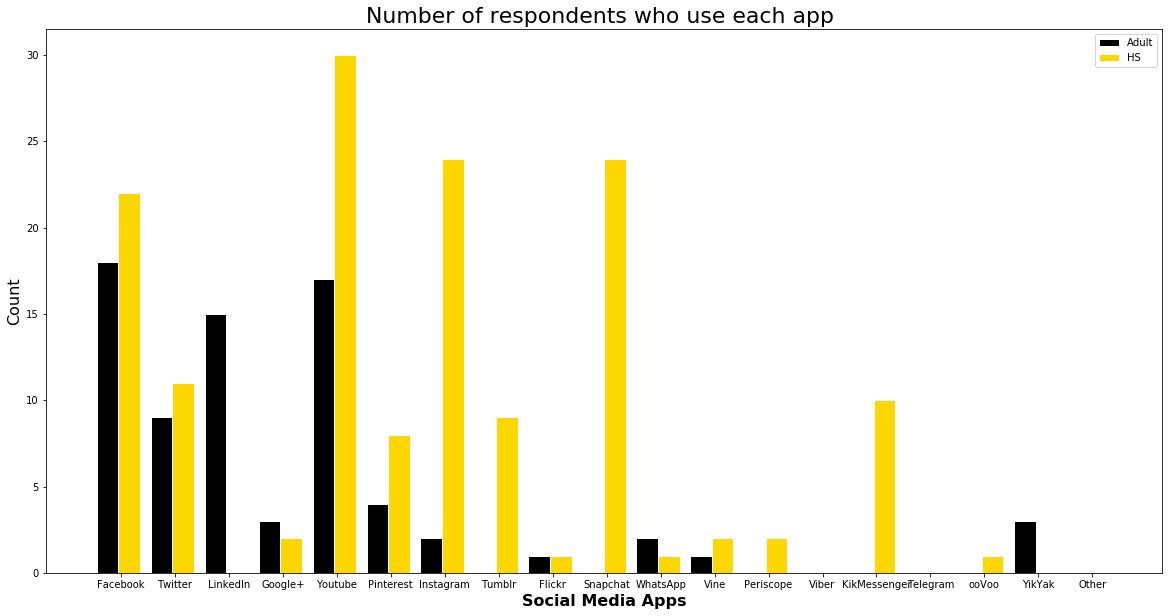

In [98]:
# set width of bar
barWidth = 0.4

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
 
# Make the plot

plt.figure(figsize=(20,10)) 
plt.bar(r1, bars1, color='black', width=barWidth, edgecolor='white', label='Adult')
plt.bar(r2, bars2, color='gold', width=barWidth, edgecolor='white', label='HS')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xticks([r - 0.15 + barWidth for r in range(len(bars1))], columns)

plt.xlabel('Social Media Apps', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)                                                 
plt.title('Number of respondents who use each app ', fontsize=22) 
 
# Create legend & Show graphic
plt.legend()
plt.show()


### Task 6  (3 points)

From the figures in the Task above, which of the apps would you expect to find at the root of a deicision tree? That is, which app (variable) would be best to separate the two classes of responses?

##### When we look at the plot we see that LinkedIn, Tumblr, Snapchat, Periscope, KiKMessenger, ooVoo and YikYak have the highest purity, i.e. these apps have just one kind of respondents so any one amongst them will be the root of the decision tree.

### Task 7 (10 points)

Construct a decision tree using this data set. Does the variable at the root of the tree match the intuition from part (b)?

In [100]:
from sklearn import tree

# import counter from collections.
from collections import Counter

# import math and random modules
import math, random


# sklearn is most important module for supervised learning. For knn import neighbors, metrics
# the need for sklearn's above modules are detailed in the link provided above. 

# import neighbors and metrics
from sklearn import neighbors, metrics

# look into metrics and import confusion matrix function
from sklearn.metrics import confusion_matrix

# import train and test split function from sklearn
from sklearn.model_selection import train_test_split

# import cross validation score from sklearn validation
from sklearn.model_selection import cross_val_score



In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import collections

In [103]:
X = df[columns]
y = df['Adult']
X.head()

,Facebook,Twitter,LinkedIn,Google+,Youtube,Pinterest,Instagram,Tumblr,Flickr,Snapchat,WhatsApp,Vine,Periscope,Viber,KikMessenger,Telegram,ooVoo,YikYak,Other
0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [104]:
y = pd.get_dummies(y)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [106]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [107]:
dt.score(X_train, y_train)

0.9777777777777777

In [110]:
import pydotplus
from IPython.display import Image 

dot_data = tree.export_graphviz(dt,
                                feature_names=columns,
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

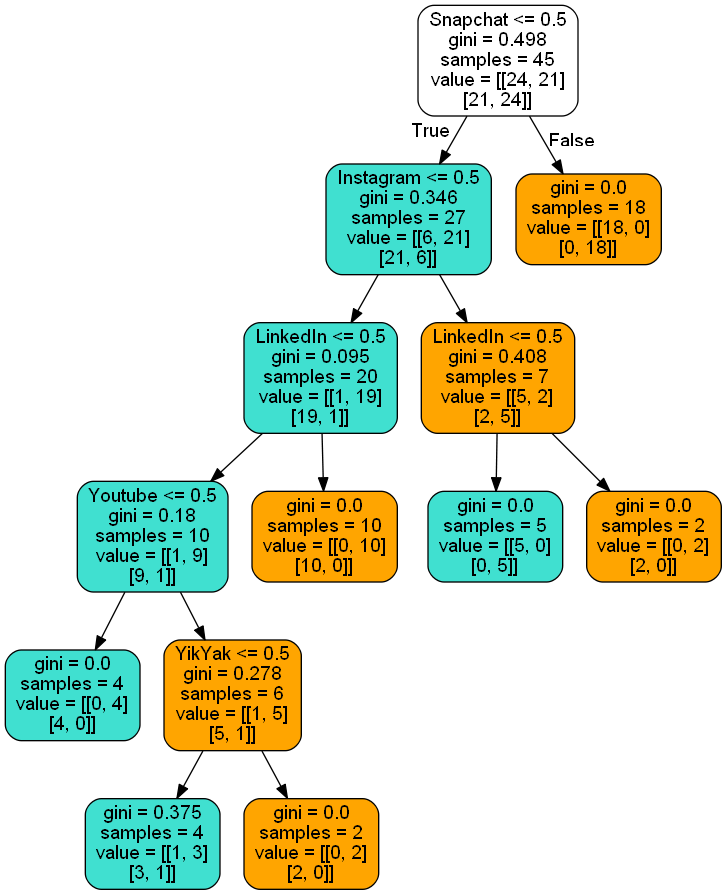

In [111]:
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
Image(graph.create_png())

In [112]:
y_pred = dt.predict(X_test)

In [113]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[5, 0],
       [3, 7]], dtype=int64)

##### The root of the decision tree comes out to be snapchat which was one of our expected apps. So, the variable at the root of the tree somewhat matches my intuition in Task 6. 

Yes, the variable at the root matches my intuition in Task 6. 

## Classification - Music Hits 

For this problem, you will work to classify a song’s popularity. Specifically, you will develop methods to predict whether a song will make the Top10 of Billboard’s Hot 100 Chart. The data set consists of song from the Top10 of Billboard’s Hot 100 Chart from 1990-2010 along with a sampling of other songs that did not make the list.  

The data source is the MIT 15.071 course. The data set was created by scraping Billboard’s Hot 100, other songs on Billboard, and using the EchoNest API, now a part of Spotify, to get song information.

The variables included in the data set include several description of the song and artist (including song title and id numbers), the year the song was released. Additionally, several variables describe the song attributes: time signature, loudness, tempo, key, energy pitch, and timbre (measured of different sections of the song). The last variable is binary indicated whether the song was in the Top10 or not.

You will use the variables of the song attributes (excluding the variables involving confidence in that attribute, e.g., key confidence) to predict whether the song will be popular or not.

### Task 8  (5 points)

Load in the `music` data. You should not use the artist or song title and IDs in the prediction along with the confidence variables.  *Note: to read in the csv you may need to adjust the encoding to avoid errors*

In [138]:
df = pd.read_csv("data/music.csv", encoding='latin-1')

In [139]:
df = df.drop(columns=['songtitle', 'artistname', 'songID', 'artistID', 'timesignature_confidence', 
                      'tempo_confidence', 'key_confidence'])

In [140]:
df.columns

Index(['year', 'timesignature', 'loudness', 'tempo', 'key', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')

In [141]:
columns = list(df.columns)
columns = columns[:31]

In [142]:
X = df[columns]
y = df['Top10']

### Task 9  (35 points)

**A.** Use kNN to predict whether a song is a hit. Estimate the generalization performance over the 10-folds, calculate and report the accuracy, error, and AUC performance on the testing data. Show these results for three values of k = 1, 3, 5, 7, 9.

**B.** Use Random Forests to predict whether a song is a hit. Calculate and report the accuracy, error, and AUC performance on the testing data for number of estimators = 10, 50, 100.

**C.** Use a Support Vector Machine (SVM) with a RBF kernel to predict whether the song is a hit. Consider at least the following values for cost: 0.01, 0.1, 1, 10, 100. Calculate and report the accuracy, error, and AUC performance on the testing data for the best model found.

Summarize and report out on the results of this task. 

**A.** Use kNN to predict whether a song is a hit. Estimate the generalization performance over the 10-folds, calculate and report the accuracy, error, and AUC performance on the testing data. Show these results for three values of k = 1, 3, 5, 7, 9.

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import classification_report

### K = 1

[0.81383855 0.81383855 0.7693575  0.77265239 0.77887789 0.80991736
 0.79669421 0.81983471 0.79008264 0.79504132]
cv_scores mean:0.7960135120895645
Accuracy =  0.7927392739273927
Error =  0.20726072607260726


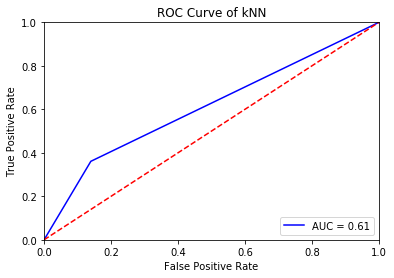

[[1127  183]
 [ 131   74]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1310
           1       0.29      0.36      0.32       205

    accuracy                           0.79      1515
   macro avg       0.59      0.61      0.60      1515
weighted avg       0.81      0.79      0.80      1515



In [147]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#train model with cv of 10
cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

y_pred = knn.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### K = 3

[0.84349259 0.84184514 0.82042834 0.82866557 0.8349835  0.83305785
 0.82644628 0.83140496 0.82809917 0.81157025]
cv_scores mean:0.8299993641718523
Accuracy =  0.833003300330033
Error =  0.166996699669967


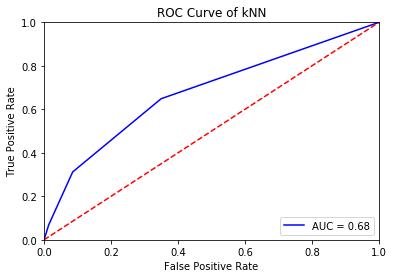

[[1198  112]
 [ 141   64]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1310
           1       0.36      0.31      0.34       205

    accuracy                           0.83      1515
   macro avg       0.63      0.61      0.62      1515
weighted avg       0.82      0.83      0.83      1515



In [148]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

y_pred = knn.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### K = 5

[0.85008237 0.85337727 0.85502471 0.85008237 0.85643564 0.83305785
 0.85619835 0.84628099 0.84132231 0.84132231]
cv_scores mean:0.8483184183327724
Accuracy =  0.8508250825082508
Error =  0.14917491749174916


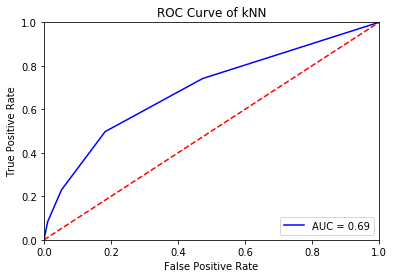

[[1242   68]
 [ 158   47]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1310
           1       0.41      0.23      0.29       205

    accuracy                           0.85      1515
   macro avg       0.65      0.59      0.61      1515
weighted avg       0.82      0.85      0.83      1515



In [149]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

y_pred = knn.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### K = 7

[0.86820428 0.85172982 0.85172982 0.8583196  0.85973597 0.83966942
 0.85454545 0.85785124 0.83801653 0.85123967]
cv_scores mean:0.8531041813182366
Accuracy =  0.8646864686468647
Error =  0.13531353135313529


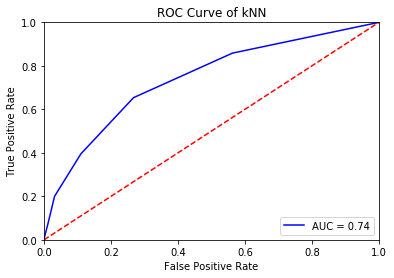

[[1269   41]
 [ 164   41]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1310
           1       0.50      0.20      0.29       205

    accuracy                           0.86      1515
   macro avg       0.69      0.58      0.61      1515
weighted avg       0.83      0.86      0.84      1515



In [150]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

y_pred = knn.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### K = 9

[0.85996705 0.85996705 0.85008237 0.85502471 0.85643564 0.84793388
 0.86115702 0.85289256 0.84628099 0.85619835]
cv_scores mean:0.8545939639643162
Accuracy =  0.8699669966996699
Error =  0.13003300330033007


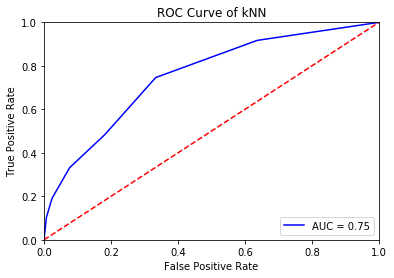

[[1279   31]
 [ 166   39]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1310
           1       0.56      0.19      0.28       205

    accuracy                           0.87      1515
   macro avg       0.72      0.58      0.61      1515
weighted avg       0.84      0.87      0.84      1515



In [151]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

y_pred = knn.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**B.** Use Random Forests to predict whether a song is a hit. Calculate and report the accuracy, error, and AUC performance on the testing data for number of estimators = 10, 50, 100.

### Number of estimators = 10

In [152]:
from sklearn.ensemble import RandomForestClassifier

Accuracy =  0.8653465346534653
Error =  0.13465346534653466


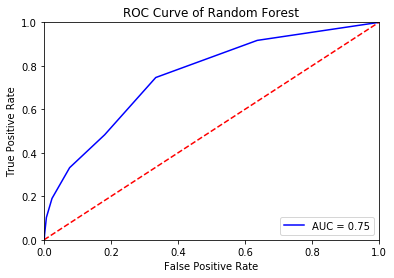

[[1286   24]
 [ 180   25]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1310
           1       0.51      0.12      0.20       205

    accuracy                           0.87      1515
   macro avg       0.69      0.55      0.56      1515
weighted avg       0.83      0.87      0.83      1515



In [153]:
RFmodel = RandomForestClassifier(n_estimators=10, random_state = 42)
RFmodel.fit(X_train, y_train);

y_pred = RFmodel.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### No of estimators = 50

Accuracy =  0.8719471947194719
Error =  0.1280528052805281


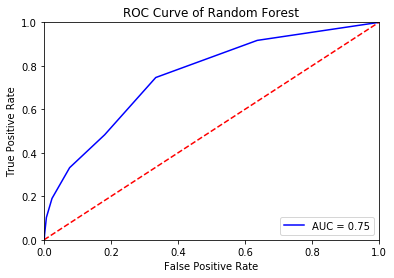

[[1299   11]
 [ 183   22]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1310
           1       0.67      0.11      0.18       205

    accuracy                           0.87      1515
   macro avg       0.77      0.55      0.56      1515
weighted avg       0.85      0.87      0.83      1515



In [154]:
RFmodel = RandomForestClassifier(n_estimators=50, random_state = 42)
RFmodel.fit(X_train, y_train);

y_pred = RFmodel.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### No of estimators = 100

Accuracy =  0.8745874587458746
Error =  0.12541254125412538


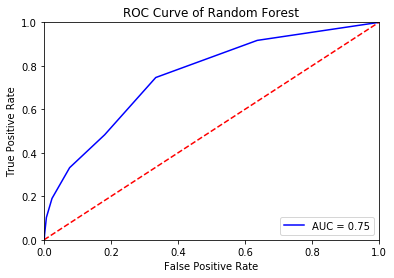

[[1302    8]
 [ 182   23]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1310
           1       0.74      0.11      0.19       205

    accuracy                           0.87      1515
   macro avg       0.81      0.55      0.56      1515
weighted avg       0.86      0.87      0.83      1515



In [155]:
RFmodel = RandomForestClassifier(n_estimators=100, random_state = 42)
RFmodel.fit(X_train, y_train);

y_pred = RFmodel.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**C.** Use a Support Vector Machine (SVM) with a RBF kernel to predict whether the song is a hit. Consider at least the following values for cost: 0.01, 0.1, 1, 10, 100. Calculate and report the accuracy, error, and AUC performance on the testing data for the best model found.

Summarize and report out on the results of this task. 

In [156]:
from sklearn import svm

Accuracy =  0.8646864686468647
Error =  0.13531353135313529


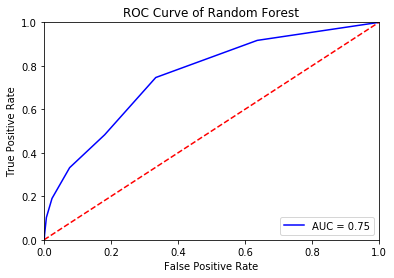

[[1310    0]
 [ 205    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1310
           1       0.00      0.00      0.00       205

    accuracy                           0.86      1515
   macro avg       0.43      0.50      0.46      1515
weighted avg       0.75      0.86      0.80      1515



C:\Users\dolia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [157]:
svc = svm.SVC(kernel='rbf', C=0.01, gamma='auto')
svc.fit(X_train, y_train);

y_pred = svc.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy =  0.8646864686468647
Error =  0.13531353135313529


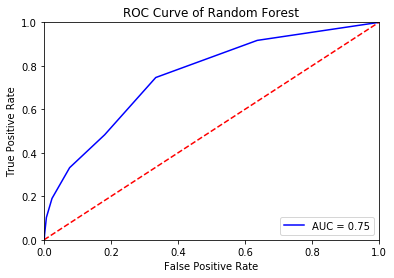

[[1310    0]
 [ 205    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1310
           1       0.00      0.00      0.00       205

    accuracy                           0.86      1515
   macro avg       0.43      0.50      0.46      1515
weighted avg       0.75      0.86      0.80      1515



C:\Users\dolia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [158]:
svc = svm.SVC(kernel='rbf', C=0.1, gamma='auto')
svc.fit(X_train, y_train);

y_pred = svc.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy =  0.8706270627062707
Error =  0.12937293729372934


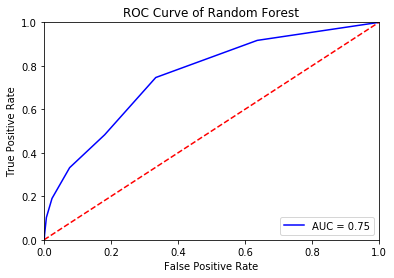

[[1294   16]
 [ 180   25]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1310
           1       0.61      0.12      0.20       205

    accuracy                           0.87      1515
   macro avg       0.74      0.55      0.57      1515
weighted avg       0.84      0.87      0.83      1515



In [159]:
svc = svm.SVC(kernel='rbf', C=1, gamma='auto')
svc.fit(X_train, y_train);

y_pred = svc.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy =  0.836963696369637
Error =  0.16303630363036303


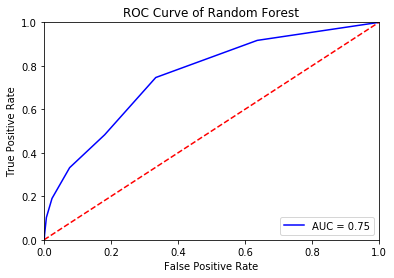

[[1189  121]
 [ 126   79]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1310
           1       0.40      0.39      0.39       205

    accuracy                           0.84      1515
   macro avg       0.65      0.65      0.65      1515
weighted avg       0.84      0.84      0.84      1515



In [160]:
svc = svm.SVC(kernel='rbf', C=100, gamma='auto')
svc.fit(X_train, y_train);

y_pred = svc.predict(X_test)

print("Accuracy = ", metrics.accuracy_score(y_pred, y_test))
print("Error = ", 1-metrics.accuracy_score(y_pred, y_test))
#print("RUC_AUC = ", metrics.roc_auc_score(y_pred, y_test))

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))